In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt


In [2]:
!pip install pandas_datareader

In [48]:
apple = data.DataReader(name='AAPL', data_source='yahoo', start='2016', end='2021')
apple.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.202784
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.596279
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.134508
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.158121
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.275295
2016-01-11,24.764999,24.334999,24.742500,24.632500,198957600.0,22.635979
2016-01-12,25.172501,24.709999,25.137501,24.990000,196616800.0,22.964500
2016-01-13,25.297501,24.325001,25.080000,24.347500,249758400.0,22.374075
2016-01-14,25.120001,23.934999,24.490000,24.879999,252680400.0,22.863413


<AxesSubplot:xlabel='Date'>

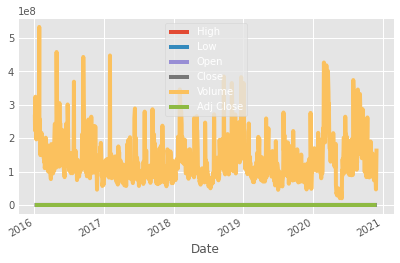

In [49]:
apple.plot()

<AxesSubplot:xlabel='Date'>

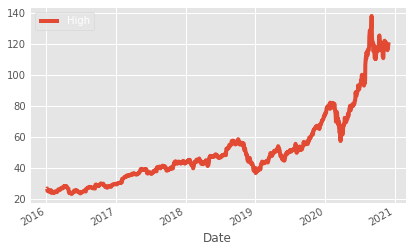

In [50]:
apple.plot(y='High')

<AxesSubplot:xlabel='Date'>

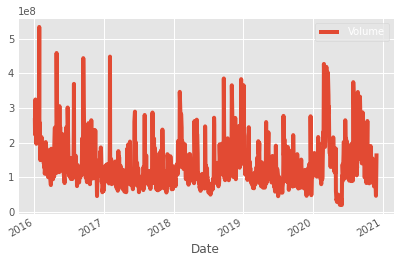

In [51]:
apple.plot(y='Volume')

<AxesSubplot:xlabel='Date'>

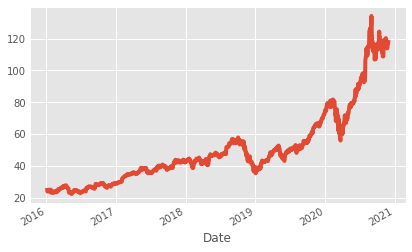

In [52]:
apple['Close'].plot()

<AxesSubplot:xlabel='Date'>

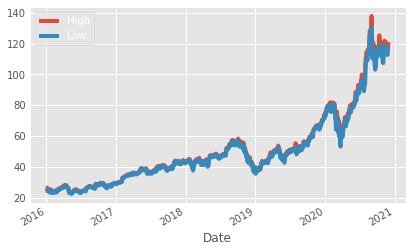

In [53]:
apple[['High', 'Low']].plot()

In [54]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

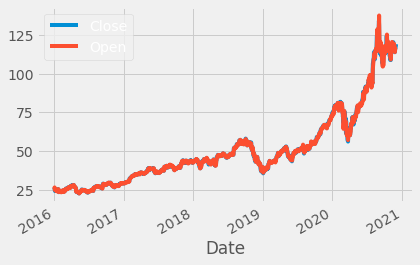

In [55]:
plt.style.use('fivethirtyeight')
apple[['Close','Open']].plot()

<AxesSubplot:xlabel='Date'>

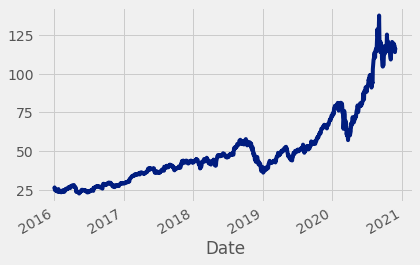

In [56]:
plt.style.use('seaborn-dark-palette')
apple['Open'].plot()

<AxesSubplot:xlabel='Date'>

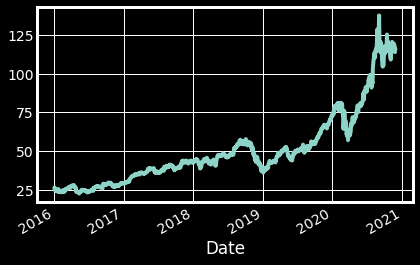

In [57]:
plt.style.use('dark_background')
apple['Open'].plot()

In [58]:
def rank_performance(stock_price):
    if stock_price < 25:
        return 'Poor'
    elif stock_price>= 25 and stock_price < 30:
        return 'Average'
    else:
        return 'Awesome'

<AxesSubplot:>

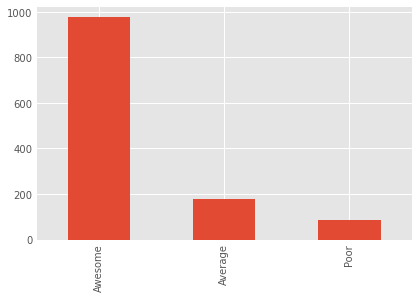

In [59]:
plt.style.use('ggplot')
apple['High'].apply(rank_performance).value_counts().plot(kind='bar')

In [60]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2016-01-04 to 2020-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1237 non-null   float64
 1   Low        1237 non-null   float64
 2   Open       1237 non-null   float64
 3   Close      1237 non-null   float64
 4   Volume     1237 non-null   float64
 5   Adj Close  1237 non-null   float64
dtypes: float64(6)
memory usage: 67.6 KB


In [61]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03,1237.000000
mean,50.907815,49.836413,50.357569,50.398367,1.323874e+08,48.926573
std,24.578236,23.747172,24.189596,24.173483,6.295831e+07,24.656385
min,22.917500,22.367500,22.500000,22.584999,2.019780e+07,20.994093
25%,35.470001,35.087502,35.314999,35.262501,9.154160e+07,33.268978
50%,44.000000,43.485001,43.757500,43.752499,1.153938e+08,42.126099
75%,56.459999,55.145000,55.880001,55.942501,1.555524e+08,54.176826
max,137.979996,130.529999,137.589996,134.179993,5.334788e+08,133.948898


<AxesSubplot:>

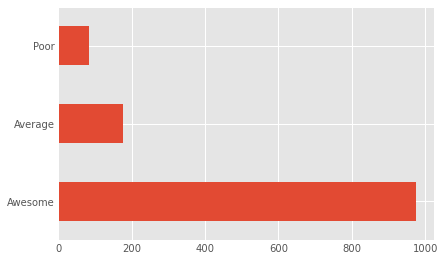

In [62]:
plt.style.use('ggplot')
apple['High'].apply(rank_performance).value_counts().plot(kind='barh')

<AxesSubplot:ylabel='High'>

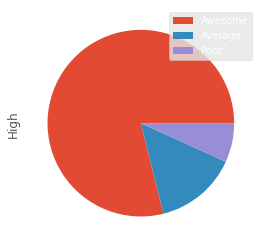

In [63]:
plt.style.use('ggplot')
apple['High'].apply(rank_performance).value_counts().plot(kind='pie',legend=True)

In [65]:
import chart_studio.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import *


df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [dict(
    type = 'scattergeo',
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = dict(
    size=2,
    color='rgb(255, 0, 0)',
    line = dict(
    width=3,
    color='rgba(68, 68, 68, 0)'
    )
    ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
            width = 1,
            color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
            )
            )

layout = dict(
    title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
    scope='north america',
    projection=dict( type='azimuthal equal area' ),
    showland = True,
    landcolor = 'rgb(243, 243, 243)',
    countrycolor = 'rgb(204, 204, 204)',
    ),
    )

fig = dict( data=flight_paths + airports, layout=layout )
plot_url = plotly.offline.plot(fig)